# FEATURE SCALING

**Feature scaling** is a crucial step in our **preprocessing** stage that can easily be forgotten.

## OVERVIEW

- [INTRODUCTION](#INTRODUCTION)  
    - [Standardization](#Standardization)
    - [Scaling features to a range - MinMaxScaler](#Scaling-features-to-a-range---MinMaxScaler)
    - [Scaling features to a range - MaxAbsScaler](#Scaling-features-to-a-range---MaxAbsScaler)
    - [Scaling data with outliers - RobustScaler](#Scaling-data-with-outliers---RobustScaler)
    - [Normalization](#Normalization)
- [EXAMPLE - Feature Scalers Comparison ](#EXAMPLE---Feature-Scalers-Comparison)
    

## INTRODUCTION

Rescaling of the data is a requirement for many machine learning algorithms as they are not scale-invariant. There exist many different rescaling techniques:

- [Standardization](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
- [Scaling features to a range - MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [Scaling features to a range - MaxAbsScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)
- [Scaling data with outliers - RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
- [Normalization](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

### Standardization

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data ( **Gaussian with zero mean and unit variance**)

$$x_{standardized} = \frac{x - \mu_x}{\sigma_x}$$

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method..
For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['legend.fontsize'] = 10

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()
X = pd.DataFrame(dataset['data'], columns=dataset.feature_names)
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)

sc.fit(X)
X_std = sc.transform(X)
pd.DataFrame(X_std, columns=X.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


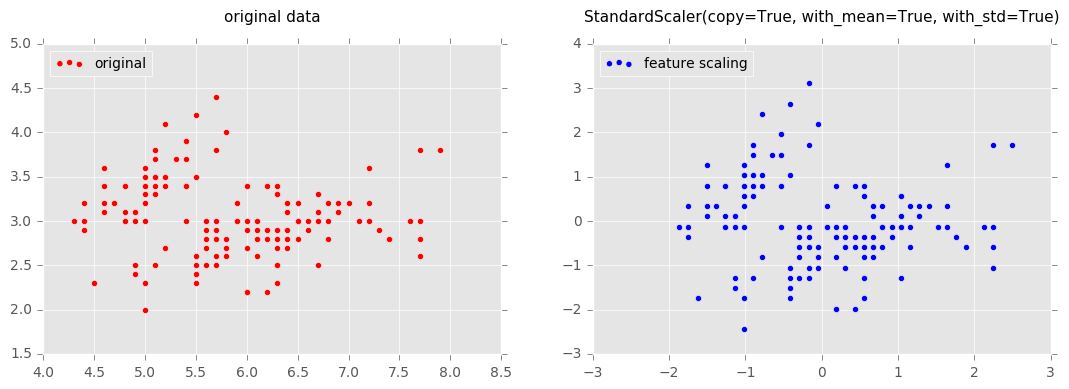

In [4]:
from modules import plot_scaling

scalers = [sc]
plot_scaling(X.loc[:,['sepal length (cm)']], X.loc[:,['sepal width (cm)']], scalers=scalers)

### Scaling features to a range - MinMaxScaler

An alternative standardization is scaling features to lie between a given minimum and maximum value, **often between zero and one**, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Although **normalization** via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, **standardization** can be more practical for many machine learning algorithms. The reason is that many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [5]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler(feature_range=(0, 1))

norm.fit(X)
X_norm = norm.transform(X)
pd.DataFrame(X_norm, columns=X.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


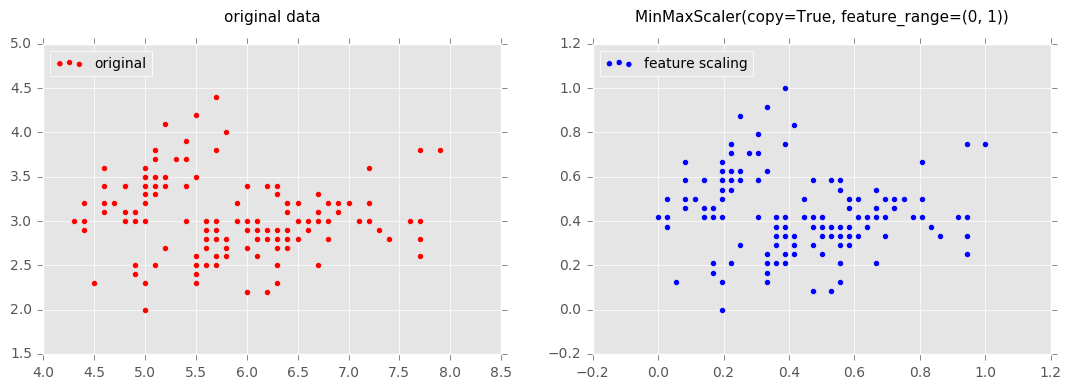

In [6]:
scalers = [norm]
plot_scaling(X.loc[:,['sepal length (cm)']], X.loc[:,['sepal width (cm)']], scalers=scalers)

### Scaling features to a range - MaxAbsScaler

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

$$x_{norm} = \frac{x}{x_{max}}$$

It works in a very similar fashion as the MinMaxScaler, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [7]:
from sklearn.preprocessing import MaxAbsScaler
norm = MaxAbsScaler()

norm.fit(X)
X_norm = norm.transform(X)
pd.DataFrame(X_norm, columns=X.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.739662,0.694091,0.544734,0.479467
std,0.104818,0.098544,0.255713,0.305264
min,0.544304,0.454545,0.144928,0.040000
25%,0.645570,0.636364,0.231884,0.120000
50%,0.734177,0.681818,0.630435,0.520000
75%,0.810127,0.750000,0.739130,0.720000
max,1.000000,1.000000,1.000000,1.000000


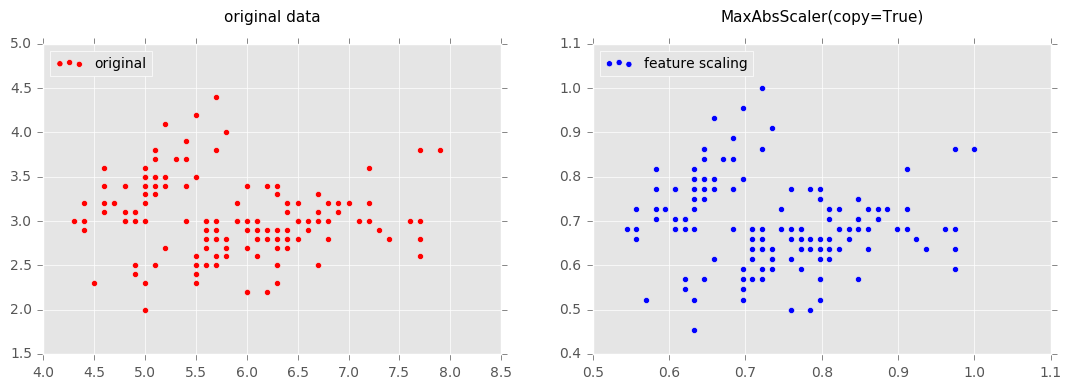

In [8]:
scalers = [norm]
plot_scaling(X.loc[:,['sepal length (cm)']], X.loc[:,['sepal width (cm)']], scalers=scalers)

### Scaling data with outliers - RobustScaler

If the data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data

$$x_{norm} = \frac{x - x_{median}}{IQR}$$

This scaler **scale features using statistics that are robust to outliers**. It removes the **median** and scales the data according to the **quantile range** (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature (or each sample, depending on the axis argument) by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results

In [9]:
from sklearn.preprocessing import RobustScaler
norm = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0,75.0))

norm.fit(X)
X_norm = norm.transform(X)
pd.DataFrame(X_norm, columns=X.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.108000,-1.689524e-01,-0.067556
std,0.636974,0.867189,5.041201e-01,0.508774
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


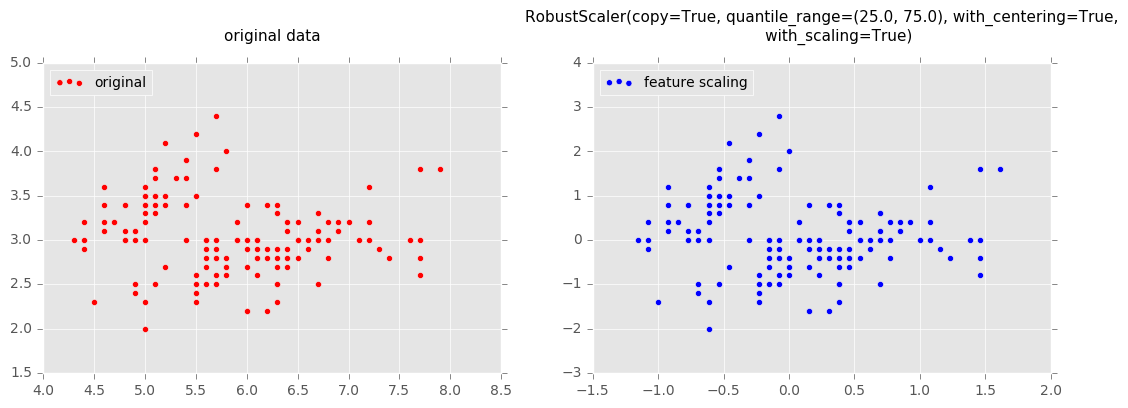

In [10]:
scalers = [norm]
plot_scaling(X.loc[:,['sepal length (cm)']], X.loc[:,['sepal width (cm)']], scalers=scalers)

### Normalization

Normalization is the process of **scaling individual samples to have unit norm**. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one. This transformer is able to work both with dense numpy arrays and scipy.sparse matrix (use CSR format if you want to avoid the burden of a copy / conversion).

Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

In [11]:
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm='l2')

norm.fit(X)
X_norm = norm.transform(X)
pd.DataFrame(X_norm, columns=X.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.751621,0.404780,0.454958,0.140965
std,0.044619,0.105087,0.159747,0.078136
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.788419,0.525237,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


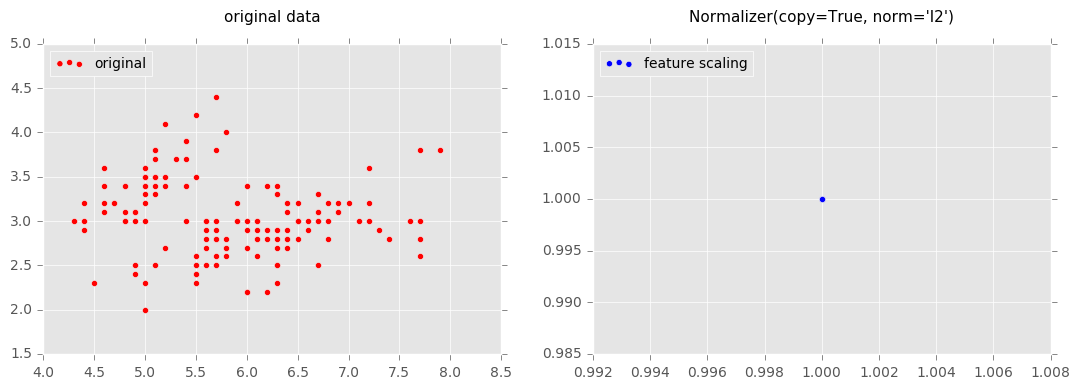

In [12]:
scalers = [norm]
plot_scaling(X.loc[:,['sepal length (cm)']], X.loc[:,['sepal width (cm)']], scalers=scalers)

### EXAMPLE - Feature Scalers Comparison 

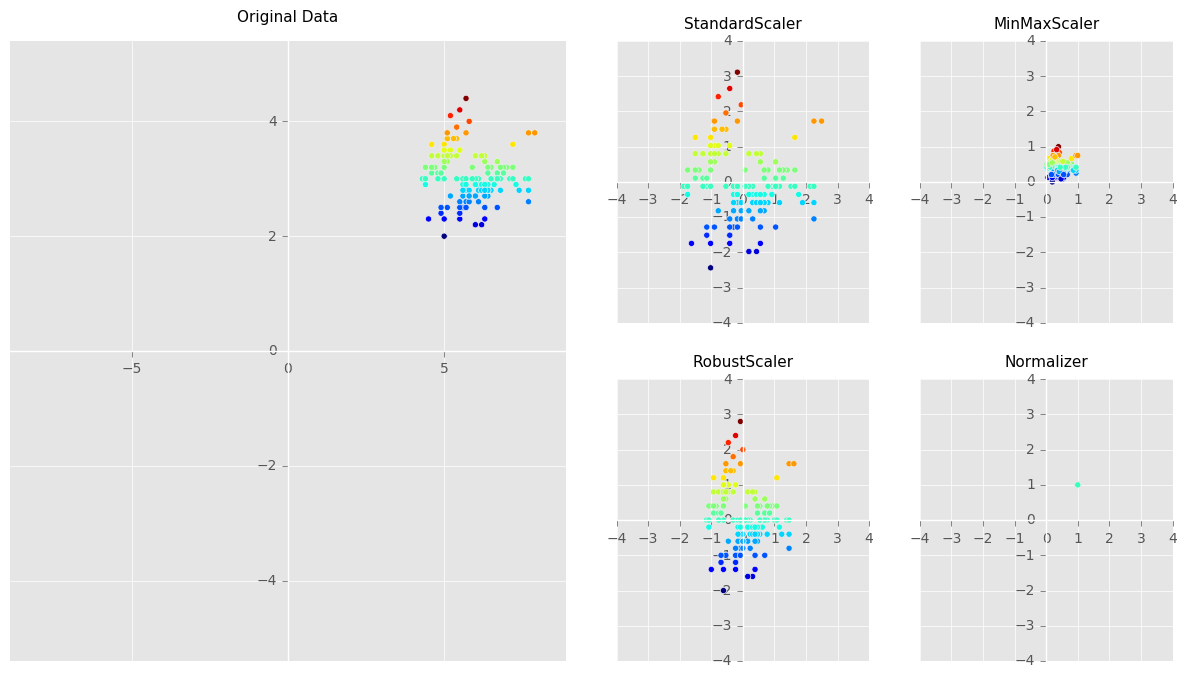

In [13]:
from modules import plot_scaling_comparison

plot_scaling_comparison(X.loc[:,['sepal length (cm)']].values, X.loc[:,['sepal width (cm)']].values)